<div class="alert alert-block alert-success">
    <b>Universidad Rey Juan Carlos de Madrid. <br>ERASMUS+ in UCBM</b>  Biomedical Engineering
</div>

<div class="alert alert-block alert-info"> Pablo Laso Mielgo </div> 

## Exercise 2.2
### IRIS DATASET
---

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
print('keys od iris_dataset: \n{}'.format(iris_dataset.keys()))

keys od iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print('Feature names:\n{}'.format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

---

## ESERCITAZIONE 2 - PARTE 2

Lo scopo questa parte della seconda esercitazione è stimare l'affidabilità di un kNN, nel caso in cui "k" sia pari ad 1 ed il numero di classi sia pari a 2. Si ricorda che il materiale bibliografico che descrive formalmente l'approccio è disponibile nella piattaforma di elearning.
Vogliamo quindi determinare se un punto classificato è:
* lontano da una zona di rischio di sovrapposizione tra classi
* lontano da una zona con outliers rispetto al resto del dataset <p>
    
Per motivi didattici, ovvero per semplificare il problema e rendere facilmente visualizzabile cosa stiamo facendo, estraiamo due feature dal "Fisher Iris", e binarizziamo il problema (i.e. lo riduciamo a due classi). In questo modo lo spazio delle feature sarà 2D. Quindi: <p>
* caricare ed inizializzare il dataset. In particolare, far sì che le label siano i numeri interi 1, 2 e 3 anzichè le stringhe con i nomi delle specie di fiori inizialmente presenti
selezionare le feature 1 e 4
* sì che tutte le osservazioni di classe 2 diventino di classe 1 e quelle di classe 3 diventino di classe 1. In pratica è sufficiente sostituire le label con valore pari a 2 con il valore 1 e le label di valore 3 con il valore 2. 
* plottare i campioni con dei punti colorati in base alla relativa classe di appartenenza
* per calcolare l'affidabilità nel seguito di questo esercizio, estraiamo il validation set (invece che farlo randomicamente, per garantire la riproducibilità dei risultati in questo esercizio si selezionano i campioni alle righe [51 53 106 108 118 119 123 126 130 131 132 136]).

In [8]:
iris_dataset = load_iris()

In [9]:
iris_dataset['data']=np.delete(np.delete(iris_dataset['data'],2,1),1,1)

In [10]:
iris_dataset['target'] # already categorical

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
data_0= []
data_1 = []
for i in range(len(iris_dataset['target'])):
    if iris_dataset['target'][i]==1:
        iris_dataset['target'][i]=0
        data_0.append(iris_dataset['data'][i])
    if iris_dataset['target'][i]==2:
        iris_dataset['target'][i]=1
        data_1.append(iris_dataset['data'][i])
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
validation_set_idx = [51,53,106,108,118,119,123,126,130,131,132,136]
features_validation_set = []
labels_validation_set = []
for i in (validation_set_idx):
    features_validation_set.append(iris_dataset['data'][i])
    labels_validation_set.append(iris_dataset['target'][i])

In [13]:
x = [x for x in range(len(iris_dataset['target'])) if x not in validation_set_idx]
features = []
labels = []
for i in x:
    features.append(iris_dataset['data'][i])   
    labels.append(iris_dataset['target'][i])

In [14]:
features=np.array(features)
labels=np.array(labels)
data_0=np.array(data_0)
data_1=np.array(data_1)

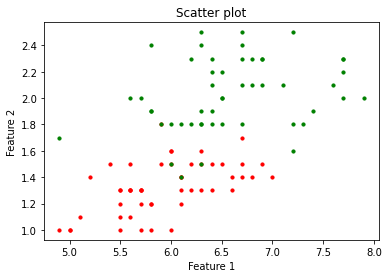

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data_0[:,0],data_0[:,1], s=10, c='r', marker="o", label='first')
ax1.scatter(data_1[:,0],data_1[:,1], s=10, c='g', marker="o", label='second')

plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Ora per i seguenti 3 nuovi campioni di test determinare la distanza tra quelli del dataset (come nella parte 1 di questa esercitazione) e cerchiarli con il colore della classe più vicina (predizione 1NN):
* p1 = [6.5 2.4]
* p2 = [6.5 1.4]
* p3 = [4.8 0.6]

In [18]:
p1 = [6.5,2.4]
p2 = [6.5,1.4]
p3 = [4.8,0.6]

dist_p1=[]
dist_p2=[]
dist_p3=[]

for sample in range(len(features_validation_set)):
    b=features_validation_set[sample]
    dist_p1.append(np.linalg.norm(p1-b))
    p1_index=dist_p1.index(min(dist_p1))
    dist_p2.append(np.linalg.norm(p2-b))
    p2_index=dist_p2.index(min(dist_p2))
    dist_p3.append(np.linalg.norm(p3-b))
    p3_index=dist_p3.index(min(dist_p3))
    
dist_abs_p1=[]
dist_abs_p2=[]
dist_abs_p3=[]

for sample in range(len(features)):
    b=features[sample]
    dist_abs_p1.append(np.linalg.norm(p1-b))
    p1_index_abs=dist_abs_p1.index(min(dist_abs_p1))
    dist_abs_p2.append(np.linalg.norm(p2-b))
    p2_index_abs=dist_abs_p2.index(min(dist_abs_p2))
    dist_abs_p3.append(np.linalg.norm(p3-b))
    p3_index_abs=dist_abs_p3.index(min(dist_abs_p3))

<function matplotlib.pyplot.show(*args, **kw)>

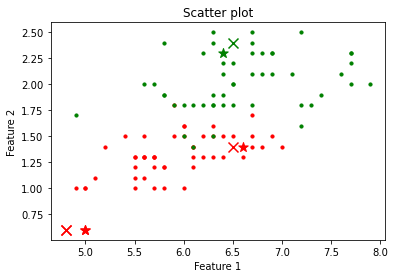

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data_0[:,0],data_0[:,1], s=10, c='r', marker="o", label='first')
ax1.scatter(data_1[:,0],data_1[:,1], s=10, c='g', marker="o", label='second')
for sample in range(len(iris_dataset['data'])):
    b=iris_dataset['data'][sample]
    if np.linalg.norm(p1-b) == min(dist_abs_p1):
        target=iris_dataset['target'][sample]
        ax1.scatter(features[p1_index_abs][0], features[p1_index_abs][1], s=100, c='g', marker="*", label='first')
        if target:
            ax1.scatter(p1[0],p1[1], s=100, c='g', marker="x", label='first')
        else:
            ax1.scatter(p1[0],p1[1], s=100, c='r', marker="x", label='first')
    if np.linalg.norm(p2-b) == min(dist_abs_p2):
        target=iris_dataset['target'][sample]
        ax1.scatter(features[p2_index_abs][0], features[p2_index_abs][1], s=100, c='r', marker="*", label='first')
        if target:
            ax1.scatter(p2[0],p2[1], s=100, c='g', marker="x", label='first')
        else:
            ax1.scatter(p2[0],p2[1], s=100, c='r', marker="x", label='first')
    if np.linalg.norm(p3-b) == min(dist_p3):
        target=iris_dataset['target'][sample]
        ax1.scatter(features[p3_index_abs][0], features[p3_index_abs][1], s=100, c='r', marker="*", label='first')
        if target:
            ax1.scatter(p3[0],p3[1], s=100, c='g', marker="x", label='first')
        else:
            ax1.scatter(p3[0],p3[1], s=100, c='r', marker="x", label='first')
plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show
# x points classfifed depending upon the dstance from * points. All others points are o.

Si deve ora calcolare le affidabilità di predizione dei tre punti; è quindi necessario fare ricorso al validation set creato all'inizio di questa esercitazione e che, ricordiamo, è costituito dai campioni del dataset originale che all'inizio erano presenti alle righe [51 53 106 108 118 119 123 126 130 131 132 136].  <p>
Calcoliamo ora le distanze dei campioni del p1, p2 e p3 da questo dataset di riferimento. Inoltre, nel grafico aggiungiamo i campioni del validation set come asterischi di colore della relativa classe.

In [21]:
val_0= []
val_1 = []
for i in (validation_set_idx):
    print(iris_dataset['data'][i])
    if iris_dataset['target'][i]==0:
        val_0.append(iris_dataset['data'][i])
    if iris_dataset['target'][i]==1:
        val_1.append(iris_dataset['data'][i])

[6.4 1.5]
[5.5 1.3]
[4.9 1.7]
[6.7 1.8]
[7.7 2.3]
[6.  1.5]
[6.3 1.8]
[6.2 1.8]
[7.4 1.9]
[7.9 2. ]
[6.4 2.2]
[6.3 2.4]


In [22]:
val_0=np.array(val_0)
val_1=np.array(val_1)

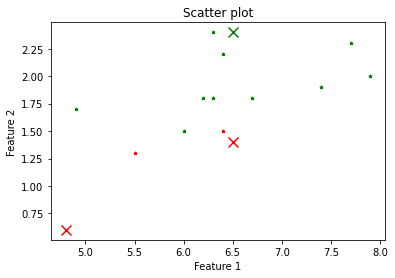

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(val_0[:,0],val_0[:,1], s=10, c='r', marker="*", label='first')
ax1.scatter(val_1[:,0],val_1[:,1], s=10, c='g', marker="*", label='second')
ax1.scatter(p1[0],p1[1], s=100, c='g', marker="x", label='first')
ax1.scatter(p2[0],p2[1], s=100, c='r', marker="x", label='first')
ax1.scatter(p3[0],p3[1], s=100, c='r', marker="x", label='first')


plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:
# I realized the validation_set_idx[51, 53, 106, 108, 118, 119, 123, 126, 130, 131, 132, 136] does not
#refer to the same points in the dataset of MATLAB than that of Python, as you can see in the graph above.

In [25]:
dist_abs_p1=[]
dist_abs_p2=[]
dist_abs_p3=[]

for sample in range(len(iris_dataset['data'])):
    b=iris_dataset['data'][sample]
    dist_abs_p1.append(np.linalg.norm(p1-b))
    dist_abs_p2.append(np.linalg.norm(p2-b))
    dist_abs_p3.append(np.linalg.norm(p3-b))
dist_abs_p1_sorted=sorted(dist_abs_p1)
dist_abs_p2_sorted=sorted(dist_abs_p2)
dist_abs_p3_sorted=sorted(dist_abs_p3)

In [26]:
iris_dataset['target'][dist_abs_p1.index(dist_abs_p1_sorted[0])]
iris_dataset['target'][dist_abs_p2.index(dist_abs_p2_sorted[0])]
iris_dataset['target'][dist_abs_p3.index(dist_abs_p3_sorted[0])]

0

In [27]:
Omax_p1=min(dist_p1)
Owin_p1=dist_abs_p1_sorted[0]
for i in range(len(dist_abs_p1)):
    if iris_dataset['target'][dist_abs_p1.index(dist_abs_p1_sorted[0])] != iris_dataset['target'][dist_abs_p1.index(dist_abs_p1_sorted[i])]:
        O2win_p1=dist_abs_p1_sorted[i]
        break
Omax_p2=min(dist_p2)
Owin_p2=dist_abs_p2_sorted[0]
for i in range(len(dist_abs_p2)):
    if iris_dataset['target'][dist_abs_p2.index(dist_abs_p2_sorted[0])] != iris_dataset['target'][dist_abs_p2.index(dist_abs_p2_sorted[i])]:
        O2win_p2=dist_abs_p2_sorted[i]
        break
Omax_p3=min(dist_p3)
Owin_p3=dist_abs_p3_sorted[0]
for i in range(len(dist_abs_p3)):
    if iris_dataset['target'][dist_abs_p3.index(dist_abs_p3_sorted[0])] != iris_dataset['target'][dist_abs_p3.index(dist_abs_p3_sorted[i])]:
        O2win_p3=dist_abs_p3_sorted[i]
        break

In [28]:
psi_a_p1 = max(Owin_p1/Omax_p1, 0)
psi_b_p1 = 1 - Owin_p1/O2win_p1
psi_p1 = min(psi_a_p1, psi_b_p1)
print(psi_a_p1,psi_b_p1,psi_p1)
psi_a_p2 = max(Owin_p2/Omax_p2, 0)
psi_b_p2 = 1 - Owin_p2/O2win_p2
psi_p2 = min(psi_a_p2, psi_b_p2)
print(psi_a_p2,psi_b_p2,psi_p2)
psi_a_p3 = max(Owin_p3/Omax_p3, 0)
psi_b_p3 = 1 - Owin_p3/O2win_p3
psi_p3 = min(psi_a_p3, psi_b_p3)
print(psi_a_p3,psi_b_p3,psi_p3)

0.7071067811865459 0.8057428275285474 0.7071067811865459
0.707106781186546 0.750000000000001 0.707106781186546
0.20203050891044227 0.8189285079149627 0.20203050891044227


---
<div class="alert alert-block alert-warning">
    Contact me:</b> <br> 
    <b>$$\rightarrow Pablo \quad Laso\quad Mielgo\quad :)$$<br> $$\rightarrow p.laso.2017@alumnos.urjc.es $$
</div>